In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import mplfinance as mpf

## Análise Exploratória

In [2]:
df_ethereum = pd.read_csv('./ethereum_365days.csv')
df_ethereum

,timestamp,open,high,low,close,volume
0,2023-09-18,1622.48,1669.50,1603.88,1636.66,279041.6978
1,2023-09-19,1636.66,1661.04,1626.32,1643.12,184282.4258
2,2023-09-20,1643.13,1649.34,1604.51,1622.26,232844.2347
3,2023-09-21,1622.27,1625.30,1567.77,1583.94,240627.5440
4,2023-09-22,1583.94,1602.68,1576.58,1593.08,124886.0910
...,...,...,...,...,...,...
360,2024-09-12,2340.54,2391.93,2315.39,2361.76,202611.1308
361,2024-09-13,2361.75,2464.82,2337.35,2439.19,253888.6160
362,2024-09-14,2439.19,2440.60,2376.72,2417.79,122931.2302
363,2024-09-15,2417.80,2430.32,2283.75,2316.10,174364.1946


In [3]:
df_ethereum.tail()

,timestamp,open,high,low,close,volume
360,2024-09-12,2340.54,2391.93,2315.39,2361.76,202611.1308
361,2024-09-13,2361.75,2464.82,2337.35,2439.19,253888.6160
362,2024-09-14,2439.19,2440.60,2376.72,2417.79,122931.2302
363,2024-09-15,2417.80,2430.32,2283.75,2316.10,174364.1946
364,2024-09-16,2316.09,2335.70,2252.39,2279.13,293981.8996


In [4]:
df_ethereum.describe()

,open,high,low,close,volume
count,365.000000,365.000000,365.000000,365.000000,3.650000e+02
mean,2727.312548,2789.901151,2659.062192,2729.110164,3.694206e+05
std,682.064454,699.696906,656.611902,680.004916,2.332389e+05
min,1539.610000,1561.720000,1521.000000,1539.610000,6.453713e+04
25%,2232.700000,2282.360000,2188.330000,2235.020000,2.286509e+05
50%,2639.990000,2717.320000,2584.200000,2639.990000,3.232856e+05
75%,3335.820000,3435.760000,3240.000000,3335.810000,4.495018e+05
max,4064.800000,4093.920000,3932.230000,4064.800000,2.670604e+06


In [5]:
df_ethereum.columns

Index(['timestamp', 'open', 'high', 'low', 'close', 'volume'], dtype='object')

In [6]:
df_ethereum.isnull().sum()

timestamp    0
open         0
high         0
low          0
close        0
volume       0
dtype: int64

In [7]:
correlacao = df_ethereum[['volume', 'open', 'high', 'low', 'close']].corr()

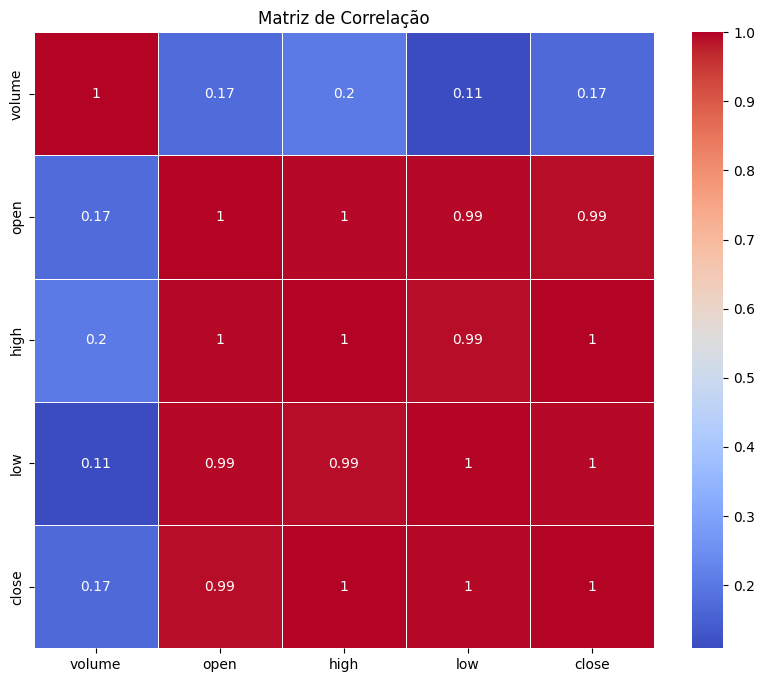

In [8]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()

In [9]:
df_ethereum['daily_return'] = df_ethereum['close'].pct_change()
df_ethereum['volatility'] = df_ethereum['daily_return'].rolling(window=7).std()
df_ethereum.head(10)

,timestamp,open,high,low,close,volume,daily_return,volatility
0,2023-09-18,1622.48,1669.50,1603.88,1636.66,279041.6978,NaN,NaN
1,2023-09-19,1636.66,1661.04,1626.32,1643.12,184282.4258,0.003947,NaN
2,2023-09-20,1643.13,1649.34,1604.51,1622.26,232844.2347,-0.012695,NaN
3,2023-09-21,1622.27,1625.30,1567.77,1583.94,240627.5440,-0.023621,NaN
4,2023-09-22,1583.94,1602.68,1576.58,1593.08,124886.0910,0.005770,NaN
5,2023-09-23,1593.07,1598.24,1587.45,1593.86,64537.1341,0.000490,NaN
6,2023-09-24,1593.85,1601.12,1570.01,1580.71,137517.8533,-0.008250,NaN
7,2023-09-25,1580.71,1597.50,1563.01,1588.33,176706.9277,0.004821,0.011067
8,2023-09-26,1588.34,1599.78,1580.05,1594.01,125583.0161,0.003576,0.011022
9,2023-09-27,1594.02,1634.10,1583.50,1598.64,274404.4328,0.002905,0.010605


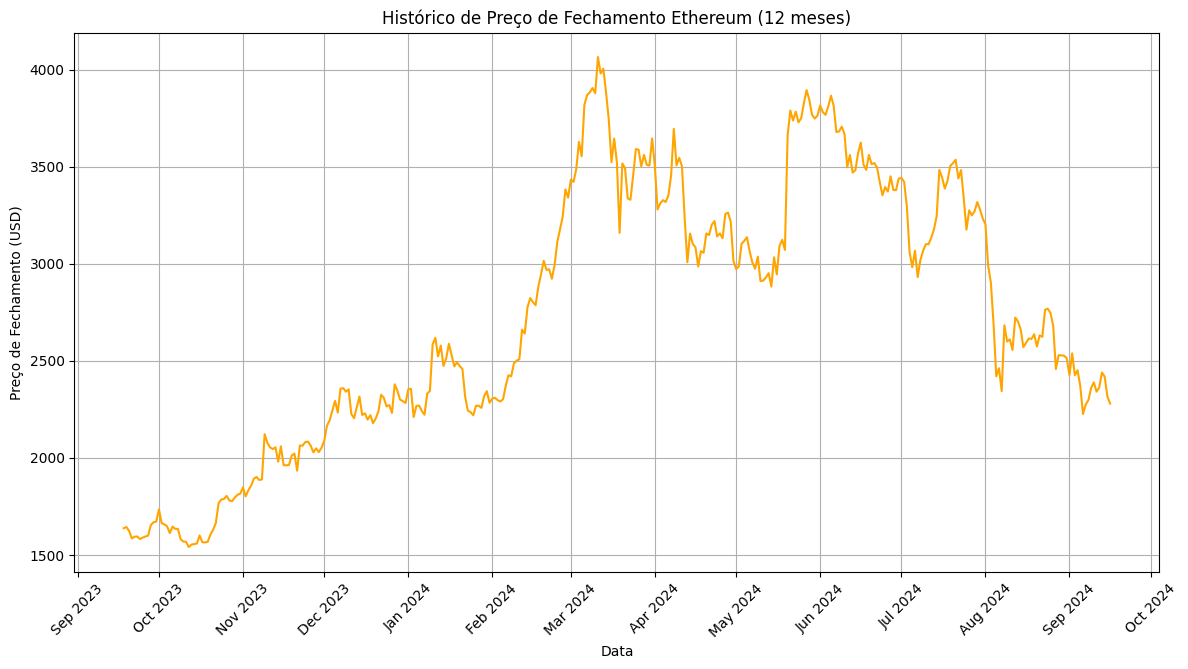

In [10]:
df_ethereum['timestamp'] = pd.to_datetime(df_ethereum['timestamp'])

plt.figure(figsize=(14,7))
plt.plot(df_ethereum['timestamp'], df_ethereum['close'], label='Preço de Fechamento', color='orange')
plt.title('Histórico de Preço de Fechamento Ethereum (12 meses)')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento (USD)')

plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y')) 
plt.xticks(rotation=45)

plt.grid(True)
plt.show()


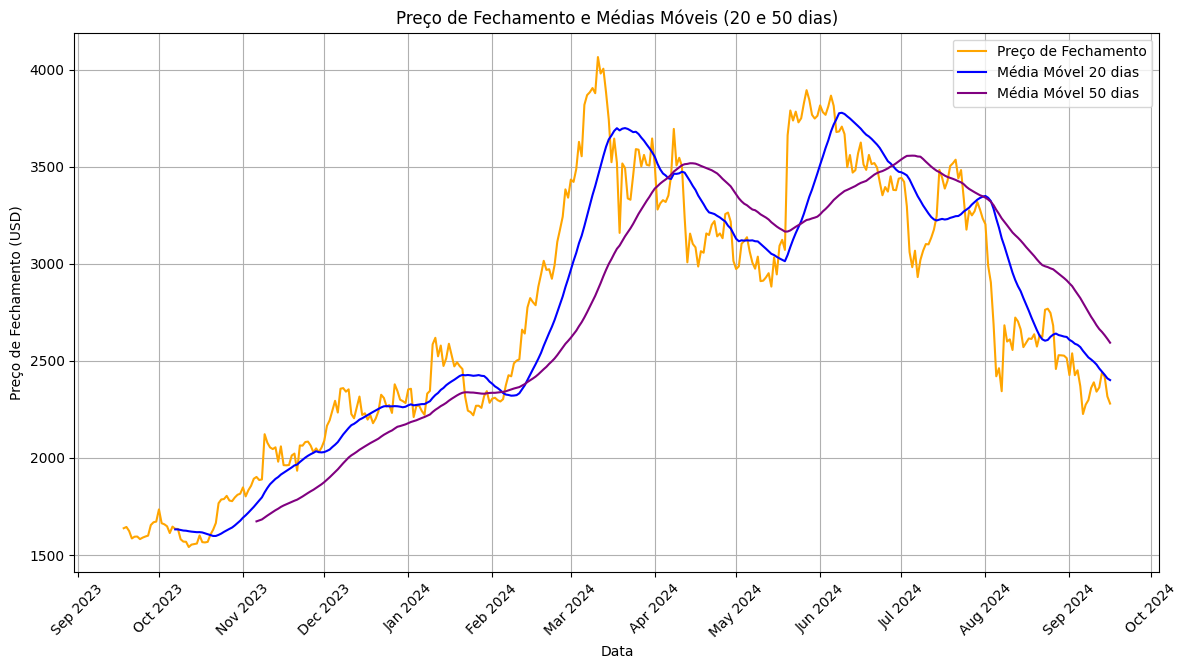

In [11]:
df_ethereum['SMA_20'] = df_ethereum['close'].rolling(window=20).mean()
df_ethereum['SMA_50'] = df_ethereum['close'].rolling(window=50).mean()

plt.figure(figsize=(14,7))
plt.plot(df_ethereum['timestamp'], df_ethereum['close'], label='Preço de Fechamento', color='orange')
plt.plot(df_ethereum['timestamp'], df_ethereum['SMA_20'], label='Média Móvel 20 dias', color='blue')
plt.plot(df_ethereum['timestamp'], df_ethereum['SMA_50'], label='Média Móvel 50 dias', color='purple')
plt.title('Preço de Fechamento e Médias Móveis (20 e 50 dias)')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento (USD)')

plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y')) 
plt.xticks(rotation=45)

plt.grid(True)
plt.legend()
plt.show()


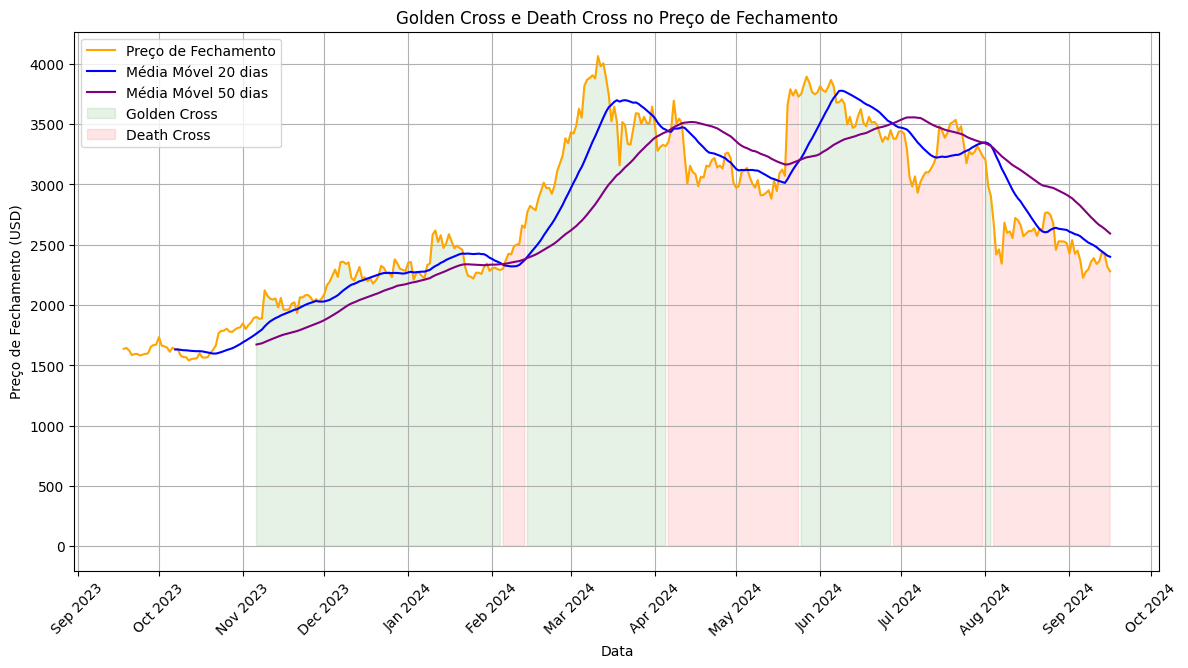

In [12]:
df_ethereum['golden_cross'] = df_ethereum['SMA_20'] > df_ethereum['SMA_50']
df_ethereum['death_cross'] = df_ethereum['SMA_20'] < df_ethereum['SMA_50']

plt.figure(figsize=(14,7))
plt.plot(df_ethereum['timestamp'], df_ethereum['close'], label='Preço de Fechamento', color='orange')
plt.plot(df_ethereum['timestamp'], df_ethereum['SMA_20'], label='Média Móvel 20 dias', color='blue')
plt.plot(df_ethereum['timestamp'], df_ethereum['SMA_50'], label='Média Móvel 50 dias', color='purple')

plt.fill_between(df_ethereum['timestamp'], df_ethereum['close'], where=df_ethereum['golden_cross'], color='green', alpha=0.1, label='Golden Cross')
plt.fill_between(df_ethereum['timestamp'], df_ethereum['close'], where=df_ethereum['death_cross'], color='red', alpha=0.1, label='Death Cross')

plt.title('Golden Cross e Death Cross no Preço de Fechamento')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento (USD)')

plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y')) 
plt.xticks(rotation=45)

plt.grid(True)
plt.legend()
plt.show()


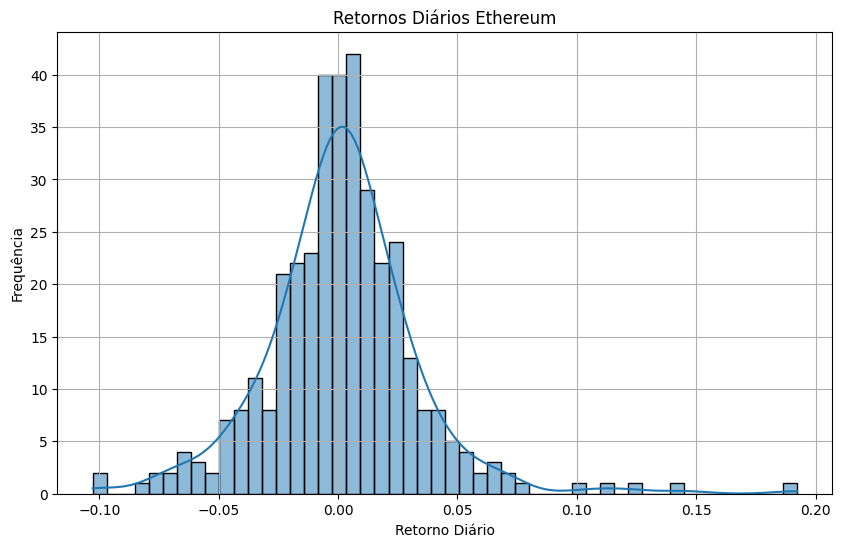

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(df_ethereum['daily_return'].dropna(), bins=50, kde=True)

plt.title('Retornos Diários Ethereum')
plt.xlabel('Retorno Diário')
plt.ylabel('Frequência')

plt.grid(True)
plt.show()

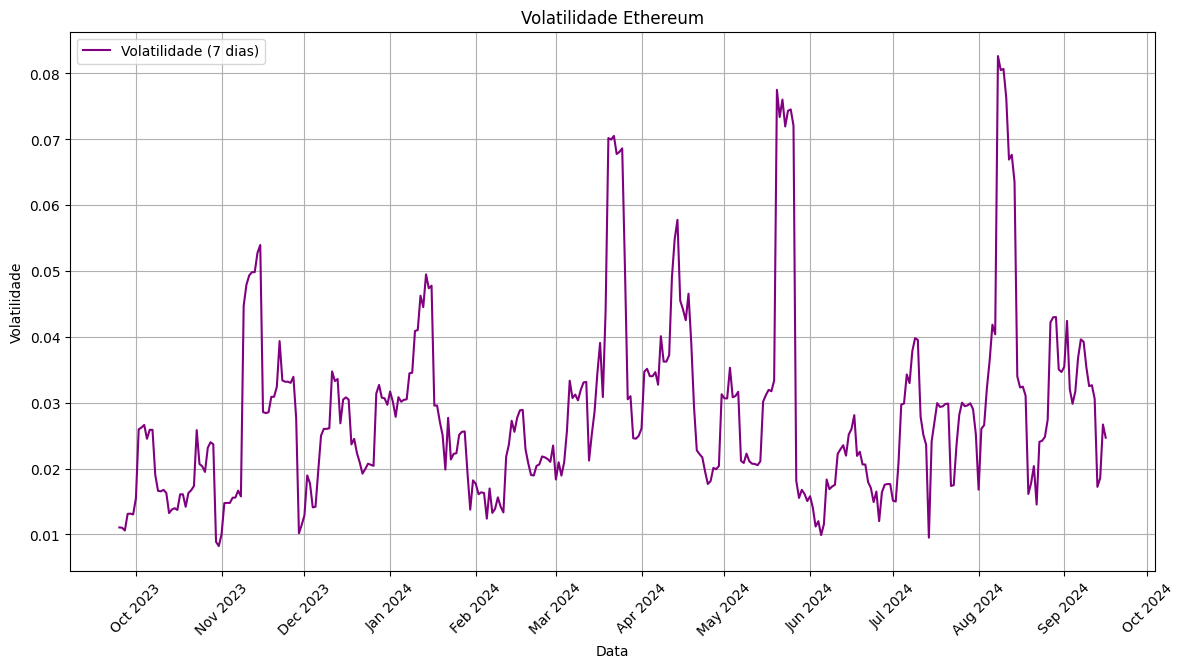

In [14]:
df_ethereum['volatility'] = df_ethereum['daily_return'].rolling(window=7).std()

plt.figure(figsize=(14,7))
plt.plot(df_ethereum['timestamp'], df_ethereum['volatility'], label='Volatilidade (7 dias)', color='purple')
plt.title('Volatilidade Ethereum')
plt.xlabel('Data')
plt.ylabel('Volatilidade')

plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y')) 
plt.xticks(rotation=45)

plt.grid(True)
plt.legend()
plt.show()

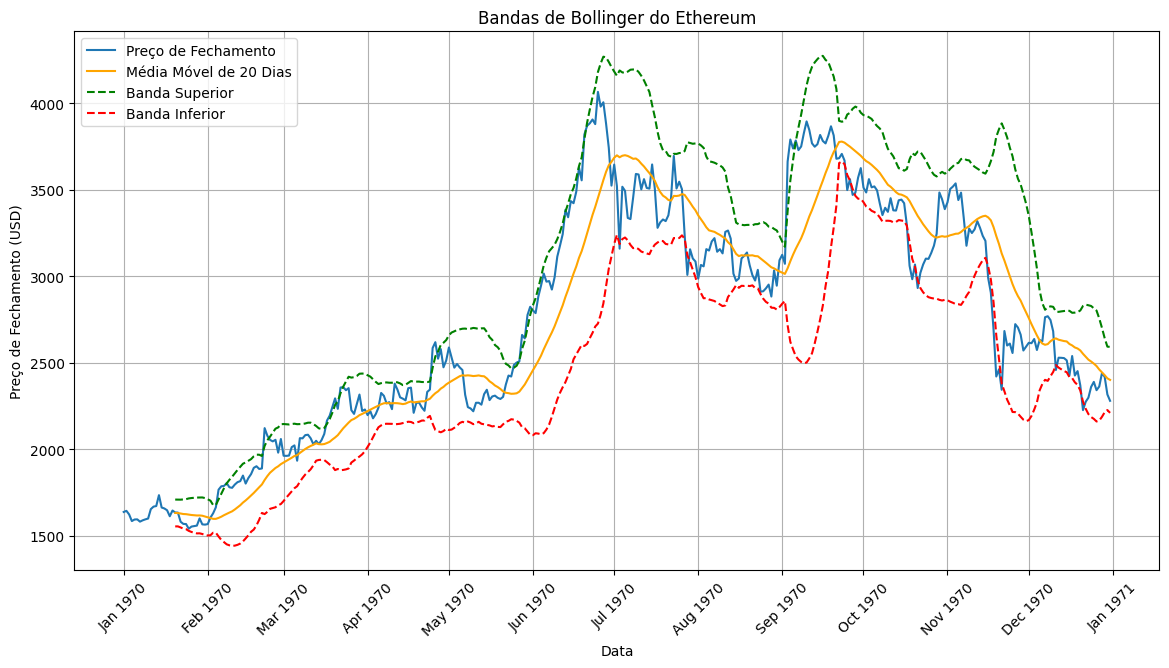

In [15]:
df_ethereum['upper_band'] = df_ethereum['SMA_20'] + (df_ethereum['close'].rolling(window=20).std() * 2)
df_ethereum['lower_band'] = df_ethereum['SMA_20'] - (df_ethereum['close'].rolling(window=20).std() * 2)

plt.figure(figsize=(14, 7))
plt.plot(df_ethereum.index, df_ethereum['close'], label='Preço de Fechamento')
plt.plot(df_ethereum.index, df_ethereum['SMA_20'], label='Média Móvel de 20 Dias', color='orange')
plt.plot(df_ethereum.index, df_ethereum['upper_band'], label='Banda Superior', color='green', linestyle='--')
plt.plot(df_ethereum.index, df_ethereum['lower_band'], label='Banda Inferior', color='red', linestyle='--')

plt.xlabel('Data')
plt.ylabel('Preço de Fechamento (USD)')
plt.title('Bandas de Bollinger do Ethereum')

plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y')) 
plt.xticks(rotation=45)

plt.legend()
plt.grid(True)
plt.show()

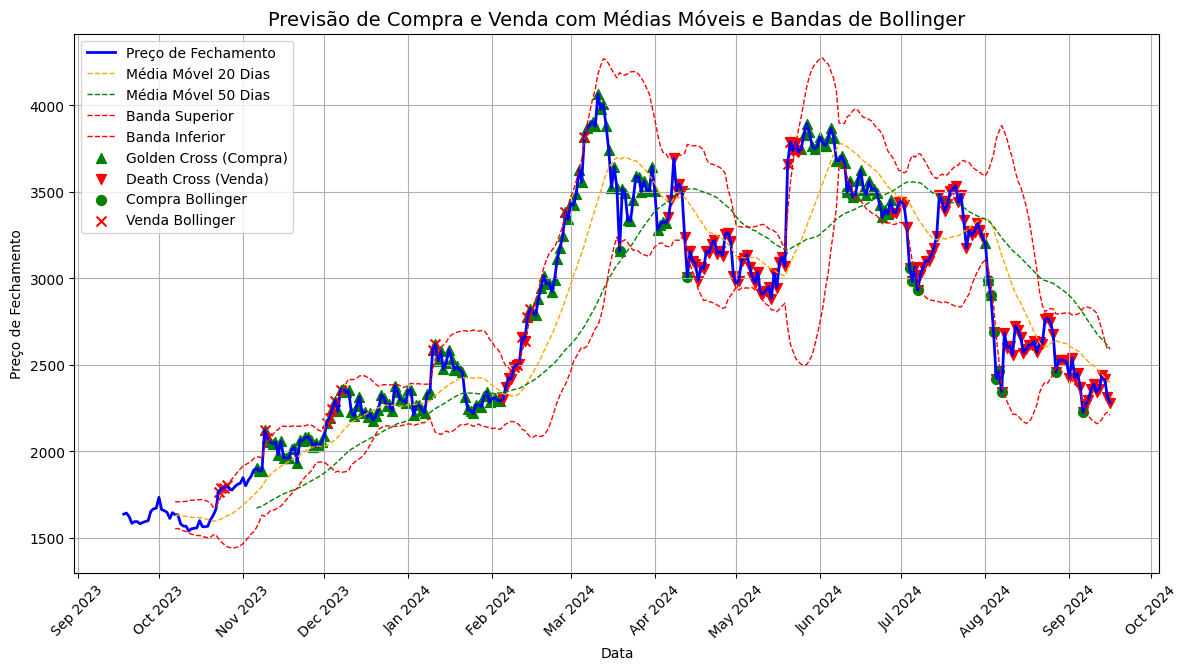

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Certificar-se de que a coluna 'timestamp' esteja em formato datetime
df_ethereum['timestamp'] = pd.to_datetime(df_ethereum['timestamp'], errors='coerce')

# Filtrar dados mais recentes para uma visualização mais clara (opcional)
df_ethereum_recent = df_ethereum[df_ethereum['timestamp'] > '2023-01-01']

# Função para calcular Médias Móveis Simples (SMA)
def calcular_medias_moveis(df_ethereum):
    df_ethereum['SMA_20'] = df_ethereum['close'].rolling(window=20).mean()
    df_ethereum['SMA_50'] = df_ethereum['close'].rolling(window=50).mean()
    return df_ethereum

# Função para calcular as Bandas de Bollinger
def calcular_bandas_bollinger(df_ethereum):
    df_ethereum['upper_band'] = df_ethereum['SMA_20'] + 2 * df_ethereum['close'].rolling(window=20).std()
    df_ethereum['lower_band'] = df_ethereum['SMA_20'] - 2 * df_ethereum['close'].rolling(window=20).std()
    return df_ethereum

# Função para gerar sinais de Golden Cross e Death Cross
def gerar_sinais(df_ethereum):
    df_ethereum['golden_cross'] = np.where(df_ethereum['SMA_20'] > df_ethereum['SMA_50'], 1, 0)
    df_ethereum['death_cross'] = np.where(df_ethereum['SMA_20'] < df_ethereum['SMA_50'], 1, 0)
    return df_ethereum

# Função para gerar sinais de compra e venda com as Bandas de Bollinger
def sinais_bollinger(df_ethereum):
    df_ethereum['Compra_Bollinger'] = np.where(df_ethereum['close'] < df_ethereum['lower_band'], 1, 0)
    df_ethereum['Venda_Bollinger'] = np.where(df_ethereum['close'] > df_ethereum['upper_band'], 1, 0)
    return df_ethereum

# Função principal para calcular tudo e fazer a visualização
def previsao_com_medias_moveis_bollinger(df_ethereum):
    # Calcular Médias Móveis e Bandas de Bollinger
    df_ethereum = calcular_medias_moveis(df_ethereum)
    df_ethereum = calcular_bandas_bollinger(df_ethereum)
    
    # Gerar Sinais
    df_ethereum = gerar_sinais(df_ethereum)
    df_ethereum = sinais_bollinger(df_ethereum)

    # Configurar o gráfico
    plt.figure(figsize=(14, 7))
    
    # Plotar o Preço de Fechamento
    plt.plot(df_ethereum['timestamp'], df_ethereum['close'], label='Preço de Fechamento', color='blue', linewidth=2)

    # Plotar as Médias Móveis
    plt.plot(df_ethereum['timestamp'], df_ethereum['SMA_20'], label='Média Móvel 20 Dias', color='orange', linestyle='--', linewidth=1)
    plt.plot(df_ethereum['timestamp'], df_ethereum['SMA_50'], label='Média Móvel 50 Dias', color='green', linestyle='--', linewidth=1)
    
    # Plotar as Bandas de Bollinger
    plt.plot(df_ethereum['timestamp'], df_ethereum['upper_band'], label='Banda Superior', color='red', linestyle='--', linewidth=1)
    plt.plot(df_ethereum['timestamp'], df_ethereum['lower_band'], label='Banda Inferior', color='red', linestyle='--', linewidth=1)

    # Adicionar Sinais de Golden Cross e Death Cross
    plt.scatter(df_ethereum[df_ethereum['golden_cross'] == 1]['timestamp'], df_ethereum[df_ethereum['golden_cross'] == 1]['close'], marker='^', color='green', label='Golden Cross (Compra)', s=50)
    plt.scatter(df_ethereum[df_ethereum['death_cross'] == 1]['timestamp'], df_ethereum[df_ethereum['death_cross'] == 1]['close'], marker='v', color='red', label='Death Cross (Venda)', s=50)

    # Adicionar Sinais de Compra e Venda com Bandas de Bollinger
    plt.scatter(df_ethereum[df_ethereum['Compra_Bollinger'] == 1]['timestamp'], df_ethereum[df_ethereum['Compra_Bollinger'] == 1]['close'], marker='o', color='green', label='Compra Bollinger', s=50)
    plt.scatter(df_ethereum[df_ethereum['Venda_Bollinger'] == 1]['timestamp'], df_ethereum[df_ethereum['Venda_Bollinger'] == 1]['close'], marker='x', color='red', label='Venda Bollinger', s=50)
    
    # Melhorar a legibilidade do eixo de datas
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    plt.xticks(rotation=45)

    # Adicionar título e rótulos dos eixos
    plt.title('Previsão de Compra e Venda com Médias Móveis e Bandas de Bollinger', fontsize=14)
    plt.xlabel('Data')
    plt.ylabel('Preço de Fechamento')
    
    plt.legend()
    plt.grid(True)
    plt.show()

# Aplicar a função de visualização no período recente
previsao_com_medias_moveis_bollinger(df_ethereum_recent)


In [17]:
df_ethereum

,timestamp,open,high,low,close,volume,daily_return,volatility,SMA_20,SMA_50,golden_cross,death_cross,upper_band,lower_band
0,2023-09-18,1622.48,1669.50,1603.88,1636.66,279041.6978,NaN,NaN,NaN,NaN,False,False,NaN,NaN
1,2023-09-19,1636.66,1661.04,1626.32,1643.12,184282.4258,0.003947,NaN,NaN,NaN,False,False,NaN,NaN
2,2023-09-20,1643.13,1649.34,1604.51,1622.26,232844.2347,-0.012695,NaN,NaN,NaN,False,False,NaN,NaN
3,2023-09-21,1622.27,1625.30,1567.77,1583.94,240627.5440,-0.023621,NaN,NaN,NaN,False,False,NaN,NaN
4,2023-09-22,1583.94,1602.68,1576.58,1593.08,124886.0910,0.005770,NaN,NaN,NaN,False,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2024-09-12,2340.54,2391.93,2315.39,2361.76,202611.1308,0.009062,0.030618,2460.0940,2663.1468,False,True,2755.354960,2164.833040
361,2024-09-13,2361.75,2464.82,2337.35,2439.19,253888.6160,0.032785,0.017234,2443.6535,2648.4210,False,True,2700.896160,2186.410840
362,2024-09-14,2439.19,2440.60,2376.72,2417.79,122931.2302,-0.008773,0.018561,2427.2365,2631.2846,False,True,2641.522101,2212.950899
363,2024-09-15,2417.80,2430.32,2283.75,2316.10,174364.1946,-0.042059,0.026694,2409.0170,2612.6264,False,True,2592.369980,2225.664020


In [18]:
df_ethereum.columns

Index(['timestamp', 'open', 'high', 'low', 'close', 'volume', 'daily_return',
       'volatility', 'SMA_20', 'SMA_50', 'golden_cross', 'death_cross',
       'upper_band', 'lower_band'],
      dtype='object')

In [19]:
df_ethereum.to_csv('df_ethereum_processado.csv',  encoding = 'utf=8')